In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
data.shape

(600, 6)

In [10]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
item = (('Undergrad','Urban','Marital.Status'))

In [13]:
for i in item:
    data[i]=le.fit_transform(data[i])

In [14]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [15]:
data.insert(6,'tax_category','')

In [16]:
for i in range(0,len(data['tax_category']),1):
    if data['Taxable.Income'][i]<=30000:
        data['tax_category'][i]='1'
    else:
        data['tax_category'][i]='0'

In [17]:
data['tax_category']=data['tax_category'].astype(int)

In [18]:
data.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
tax_category       int32
dtype: object

In [19]:
x=data.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=data['tax_category']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [23]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred_test = dt_model.predict(x_test)

In [25]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [26]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        93
           1       0.21      0.26      0.23        27

    accuracy                           0.62       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.64      0.62      0.63       120



In [27]:
print(accuracy_score(y_test,y_pred_test))

0.6166666666666667


In [28]:
print(confusion_matrix(y_test,y_pred_test))

[[67 26]
 [20  7]]


In [29]:
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data:',auc_test)

auc value for test data: 0.4898446833930705


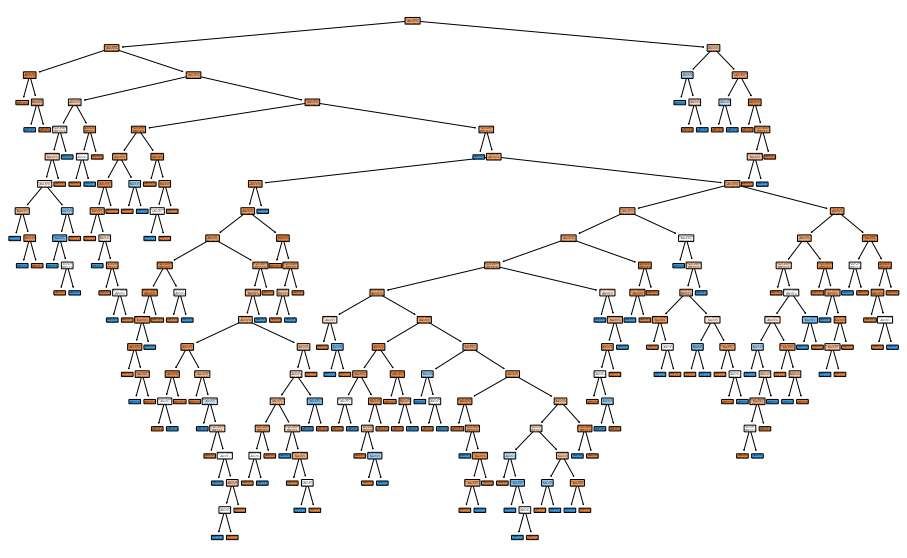

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True)
plt.show()

auc value for test data 0.4898446833930705


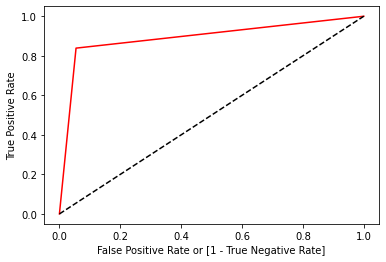

In [31]:
fpr, tpr, thresholds = roc_curve(y,dt_model.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

In [32]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = dt_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7979166666666666


In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_model_tweak=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [34]:
dt_model_tweak.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [35]:
y_pred_train_tweak=dt_model_tweak.predict(x_train)
y_pred_test_tweak=dt_model_tweak.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87        93
           1       0.00      0.00      0.00        27

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.60      0.78      0.68       120



In [37]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.775


In [38]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.5


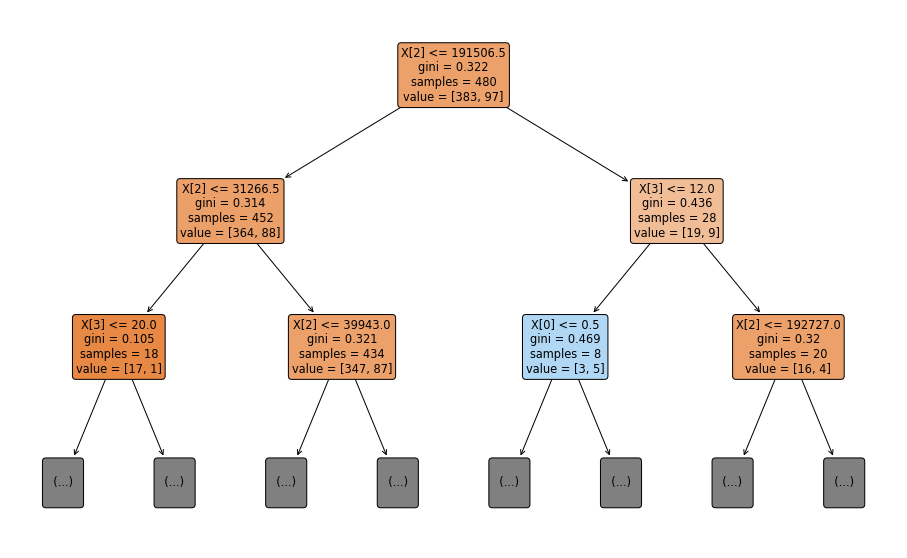

In [39]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True,max_depth=2)
plt.show()

auc value for test data 0.5


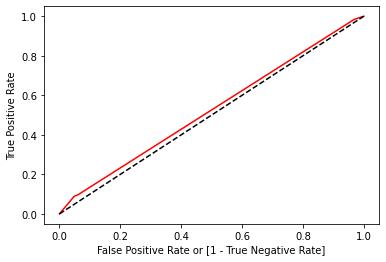

In [40]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y,dt_model_tweak.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

In [41]:
data['tax_category'].value_counts()

0    476
1    124
Name: tax_category, dtype: int64

<AxesSubplot:xlabel='tax_category', ylabel='count'>

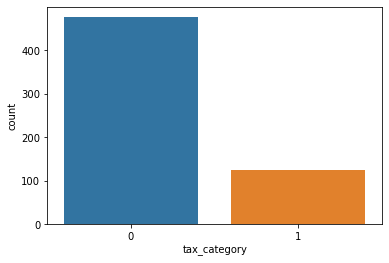

In [42]:
sns.countplot(data['tax_category'])

In [43]:
dt_model_imb=DecisionTreeClassifier(class_weight={0:1,1:5}).fit(x_train,y_train)

In [44]:
y_pred=dt_model_imb.predict(x_test)

In [45]:
print(accuracy_score(y_test,y_pred))

0.725
